In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import fastf1


In [235]:
# Enable cache
fastf1.Cache.enable_cache('~/f1_cache')


def get_fastest_available_top_speed(year, round_number, session_type="R"):
    """
    Return fastest available speed trap value from timing data.
    Uses laps data instead of results (more reliable).
    """
    session = fastf1.get_session(year, round_number, session_type)
    session.load()

    laps = session.laps

    # Speed trap column names vary: "SpeedST", sometimes "Speed I1/I2/M"
    if "SpeedST" in laps.columns:
        col = "SpeedST"
    else:
        # fallback: pick the highest-speed column available
        speed_cols = [c for c in laps.columns if c.lower().startswith("speed")]
        if not speed_cols:
            return None, None
        col = speed_cols[0]

    # Remove rows with no speed recorded
    valid = laps[["Driver", col]].dropna()

    if valid.empty:
        return None, None

    fastest = valid.sort_values(col, ascending=False).iloc[0]
    return fastest["Driver"], fastest[col]


# -------- Build DataFrame for 2024 --------

events = fastf1.get_event_schedule(2022)
records = []

for _, row in events.iterrows():
    rnd = row["RoundNumber"]
    name = row["EventName"]

    try:
        drv, speed = get_fastest_available_top_speed(2022, rnd)

        print(f"{rnd}: {name}: {drv} - {speed}")

        records.append({
            "RoundNumber": rnd,
            "GrandPrix": name,
            "Driver": drv,
            "TopSpeed_kmh": speed
        })

    except Exception as e:
        print(f"ERROR {rnd}: {name}: {e}")
        records.append({
            "RoundNumber": rnd,
            "GrandPrix": name,
            "Driver": None,
            "TopSpeed_kmh": None
        })

df = pd.DataFrame(records)
top_speed = df.copy()

print(df)


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


ERROR 0: Pre-Season Track Session: Cannot get testing event by round number!
ERROR 0: Pre-Season Test: Cannot get testing event by round number!


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 16 completed the race distance 00:00.050000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_

1: Bahrain Grand Prix: VER - 327.0


core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 22)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 47)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '11', '63', '31', '4', '10', '20', '44', '24', '27', '18', '23', '77', '14', '3', '6', '22', '47']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using

2: Saudi Arabian Grand Prix: VER - 334.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 16 completed the race distance 00:00.140000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['16', '11', '63', '44', '4', '3', '31', '77', '10', '23', '24', '18', '47', '20', '22', '6', '14', '1', '5', '55']
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_

3: Australian Grand Prix: MSC - 326.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '63', '77', '16', '22', '5', '20', '18', '23', '10', '44', '31', '24', '6', '47', '3', '14', '55']
core           INFO 	Loading data for Miami Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


4: Emilia Romagna Grand Prix: ALB - 297.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '11', '63', '44', '77', '31', '23', '18', '14', '22', '3', '6', '47', '20', '5', '10', '4', '24']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


5: Miami Grand Prix: MAG - 345.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '63', '55', '44', '77', '31', '4', '14', '22', '5', '3', '10', '47', '18', '6', '20', '23', '24', '16']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for 

6: Spanish Grand Prix: MSC - 333.0


core        WARNING 	Fixed incorrect tyre stint information for driver '3'
core        WARNING 	Fixed incorrect tyre stint information for driver '18'
core        WARNING 	Fixed incorrect tyre stint information for driver '6'
core        WARNING 	Fixed incorrect tyre stint information for driver '24'
core        WARNING 	Fixed incorrect tyre stint information for driver '22'
core        WARNING 	Fixed incorrect tyre stint information for driver '23'
core        WARNING 	Fixed incorrect tyre stint information for driver '47'
core        WARNING 	Fixed incorrect tyre stint information for driver '20'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '55', '1', '16', '63', '4', '14', '44', '77', '5', '10', '31', '3', '18', '6', '24', '22', '23', '

7: Monaco Grand Prix: ALB - 289.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '63', '44', '10', '5', '14', '3', '4', '31', '77', '23', '22', '47', '6', '18', '20', '24', '16', '55']
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


8: Azerbaijan Grand Prix: ALO - 332.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '44', '63', '16', '31', '77', '24', '14', '18', '3', '5', '23', '10', '4', '6', '20', '22', '47', '11']
core           INFO 	Loading data for British Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


9: Canadian Grand Prix: LEC - 342.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '11', '44', '16', '14', '4', '1', '47', '5', '20', '18', '6', '3', '22', '31', '10', '77', '63', '24', '23']
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information fo

10: British Grand Prix: PER - 332.0


core        WARNING 	Fixed incorrect tyre stint information for driver '6'
core        WARNING 	Fixed incorrect tyre stint information for driver '11'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 16 completed the race distance 00:00.024000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '44', '63', '31', '47', '4', '20', '3', '14', '77', '23', '18', '24', '10', '22', '5', '55', '6', '11']
core           INFO 	Loading data for French Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached

11: Austrian Grand Prix: ALB - 321.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.041000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '11', '55', '14', '4', '31', '3', '18', '5', '10', '23', '77', '47', '24', '6', '20', '16', '22']
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_da

12: French Grand Prix: SAI - 344.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '55', '11', '16', '4', '14', '31', '5', '18', '10', '24', '47', '3', '20', '23', '6', '22', '77']
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for

13: Hungarian Grand Prix: ALB - 310.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '63', '14', '16', '31', '5', '10', '23', '18', '4', '22', '24', '3', '20', '47', '6', '77', '44']
core           INFO 	Loading data for Dutch Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


14: Belgian Grand Prix: ZHO - 321.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '16', '44', '11', '14', '4', '55', '31', '18', '10', '23', '47', '5', '20', '24', '3', '6', '77', '22']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


15: Dutch Grand Prix: PER - 327.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '44', '11', '4', '10', '45', '24', '31', '47', '77', '22', '6', '20', '3', '18', '14', '5']
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


16: Italian Grand Prix: SAI - 356.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '16', '55', '4', '3', '18', '1', '5', '44', '10', '77', '20', '47', '63', '22', '31', '23', '14', '6', '24']
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


17: Singapore Grand Prix: VER - 304.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '31', '44', '5', '14', '63', '6', '4', '3', '18', '22', '20', '77', '24', '47', '10', '55', '23']
core           INFO 	Loading data for United States Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


18: Japanese Grand Prix: ALO - 294.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '16', '11', '63', '4', '14', '5', '20', '22', '31', '24', '23', '10', '47', '3', '6', '18', '77', '55']
core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


19: United States Grand Prix: ZHO - 334.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '11', '63', '55', '16', '3', '31', '4', '77', '10', '23', '24', '5', '18', '47', '20', '6', '14', '22']
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


20: Mexico City Grand Prix: LAT - 356.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '44', '55', '16', '14', '1', '11', '31', '77', '18', '5', '24', '47', '10', '23', '6', '22', '4', '20', '3']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


21: São Paulo Grand Prix: STR - 338.0


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '55', '63', '4', '31', '18', '3', '5', '22', '24', '23', '10', '77', '47', '20', '44', '6', '14']


22: Abu Dhabi Grand Prix: OCO - 334.0
    RoundNumber                  GrandPrix Driver  TopSpeed_kmh
0             0   Pre-Season Track Session   None           NaN
1             0            Pre-Season Test   None           NaN
2             1         Bahrain Grand Prix    VER         327.0
3             2   Saudi Arabian Grand Prix    VER         334.0
4             3      Australian Grand Prix    MSC         326.0
5             4  Emilia Romagna Grand Prix    ALB         297.0
6             5           Miami Grand Prix    MAG         345.0
7             6         Spanish Grand Prix    MSC         333.0
8             7          Monaco Grand Prix    ALB         289.0
9             8      Azerbaijan Grand Prix    ALO         332.0
10            9        Canadian Grand Prix    LEC         342.0
11           10         British Grand Prix    PER         332.0
12           11        Austrian Grand Prix    ALB         321.0
13           12          French Grand Prix    SAI         344.0
14

In [420]:

top_speed

,RoundNumber,GrandPrix,Driver,TopSpeed_kmh
0,0,Pre-Season Track Session,None,NaN
1,0,Pre-Season Test,None,NaN
2,1,Bahrain Grand Prix,VER,327.0
3,2,Saudi Arabian Grand Prix,VER,334.0
4,3,Australian Grand Prix,MSC,326.0
5,4,Emilia Romagna Grand Prix,ALB,297.0
6,5,Miami Grand Prix,MAG,345.0
7,6,Spanish Grand Prix,MSC,333.0
8,7,Monaco Grand Prix,ALB,289.0
9,8,Azerbaijan Grand Prix,ALO,332.0


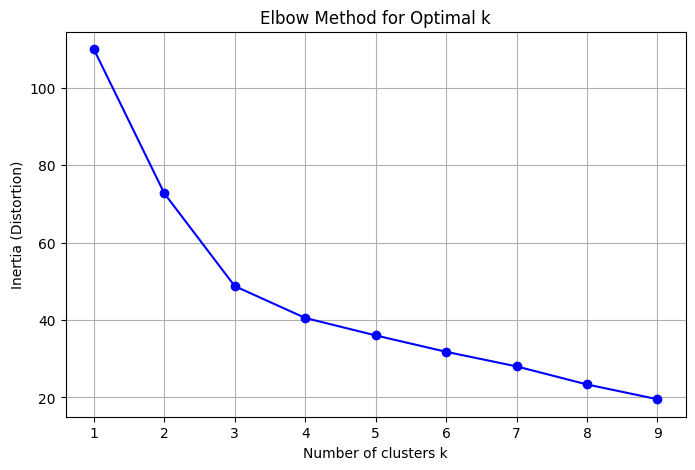

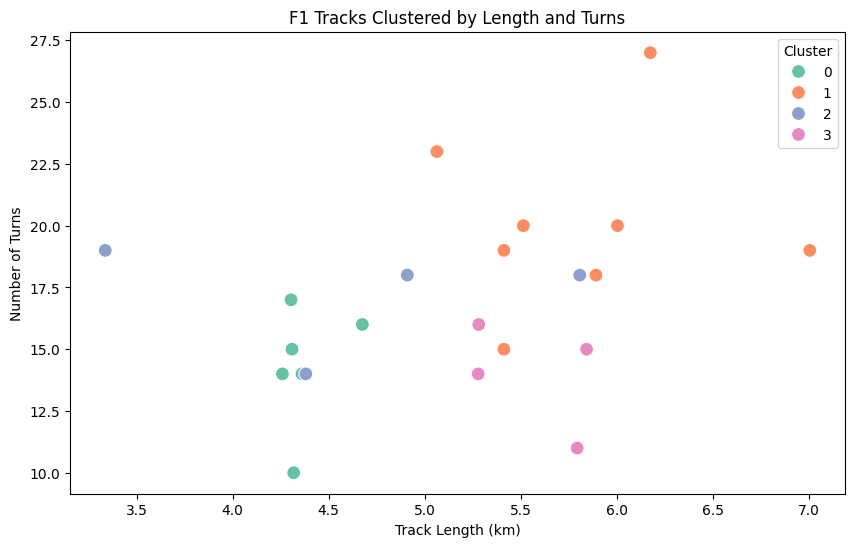


Cluster 0 examples:
                      Circuit Name       City  Country  Circuit Length(km)  \
5   Circuit de Barcelona-Catalunya  Catalunya    Spain               4.675   
8        Circuit Gilles-Villeneuve   Montréal   Canada               4.361   
10                   Red Bull Ring  Spielberg  Austria               4.318   

    Turns  DRS Zones  TopSpeed_kmh  
5      16          2         333.0  
8      14          3         342.0  
10     10          3         321.0  

Cluster 1 examples:
                    Circuit Name    City        Country  Circuit Length(km)  \
0  Bahrain International Circuit  Sakhir        Bahrain               5.412   
1        Jeddah Corniche Circuit  Jeddah   Saudi Arabia               6.174   
4  Miami International Autodrome   Miami  United States               5.412   

   Turns  DRS Zones  TopSpeed_kmh  
0     15          3         327.0  
1     27          3         334.0  
4     19          3         345.0  

Cluster 2 examples:
               

In [421]:
url = 'https://raw.githubusercontent.com/toUpperCase78/formula1-datasets/master/Formula1_2022season_calendar.csv'
df = pd.read_csv(url)
df['Lap Record'] = df['Lap Record'].apply(lambda t: int(t.split(':')[0]) * 60 + float(t.split(':')[1]))
df = df.merge(top_speed[['RoundNumber', 'TopSpeed_kmh']], left_on='Round', right_on='RoundNumber', how='left')
features = ['Circuit Length(km)', 'Turns', 'DRS Zones', 'Lap Record', 'TopSpeed_kmh']
X = df[features].copy()
X = X.dropna()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find optimal k
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
#plt.show()

k_final = 4
kmeans = KMeans(n_clusters=k_final, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='Circuit Length(km)', y='Turns',
    hue='cluster', palette='Set2', s=100
)
plt.title('F1 Tracks Clustered by Length and Turns')
plt.xlabel('Track Length (km)')
plt.ylabel('Number of Turns')
plt.legend(title='Cluster')
plt.show()


for c in range(k_final):
    print(f"\nCluster {c} examples:")
    print(df[df['cluster'] == c][['Circuit Name', 'City', 'Country', 'Circuit Length(km)', 'Turns', 'DRS Zones', 'TopSpeed_kmh']].head(3))

In [422]:
clustered_tracks[clustered_tracks['cluster']==1]

,Round,Race Date,GP Name,Country,City,Circuit Name,First GP,Number of Laps,Circuit Length(km),Race Distance(km),Lap Record,Record Owner,Record Year,Turns,DRS Zones,RoundNumber,TopSpeed_kmh,cluster
0,1,20/03/2022,Gulf Air Bahrain GP,Bahrain,Sakhir,Bahrain International Circuit,2004,57,5.412,308.238,91.447,Pedro de la Rosa,2005,15,3,1,327.0,1
1,2,27/03/2022,STC Saudi Arabian GP,Saudi Arabia,Jeddah,Jeddah Corniche Circuit,2021,50,6.174,308.450,90.774,Lewis Hamilton,2021,27,3,2,334.0,1
4,5,08/05/2022,Crypto.com Miami GP,United States,Miami,Miami International Autodrome,2022,57,5.412,308.326,91.361,Max Verstappen,2022,19,3,5,345.0,1
7,8,12/06/2022,Azerbaijan GP,Azerbaijan,Baku,Baku City Circuit,2016,51,6.003,306.049,103.009,Charles Leclerc,2019,20,2,8,332.0,1
9,10,03/07/2022,Lenovo British GP,Great Britain,Silverstone,Silverstone Circuit,1950,52,5.891,306.198,87.097,Max Verstappen,2020,18,2,10,332.0,1
13,14,28/08/2022,Rolex Belgian GP,Belgium,Spa-Francorchamps,Circuit de Spa-Francorchamps,1950,44,7.004,308.052,106.286,Valtter Bottas,2018,19,2,14,321.0,1
16,17,02/10/2022,Singapore Airlines Singapore GP,Singapore,Singapore,Marina Bay Street Circuit,2008,61,5.063,308.706,101.905,Kevin Magnussen,2018,23,3,17,304.0,1
18,19,23/10/2022,Aramco United States GP,United States,Austin,Circuit of the Americas,2012,56,5.513,308.405,96.169,Charles Leclerc,2019,20,2,19,334.0,1


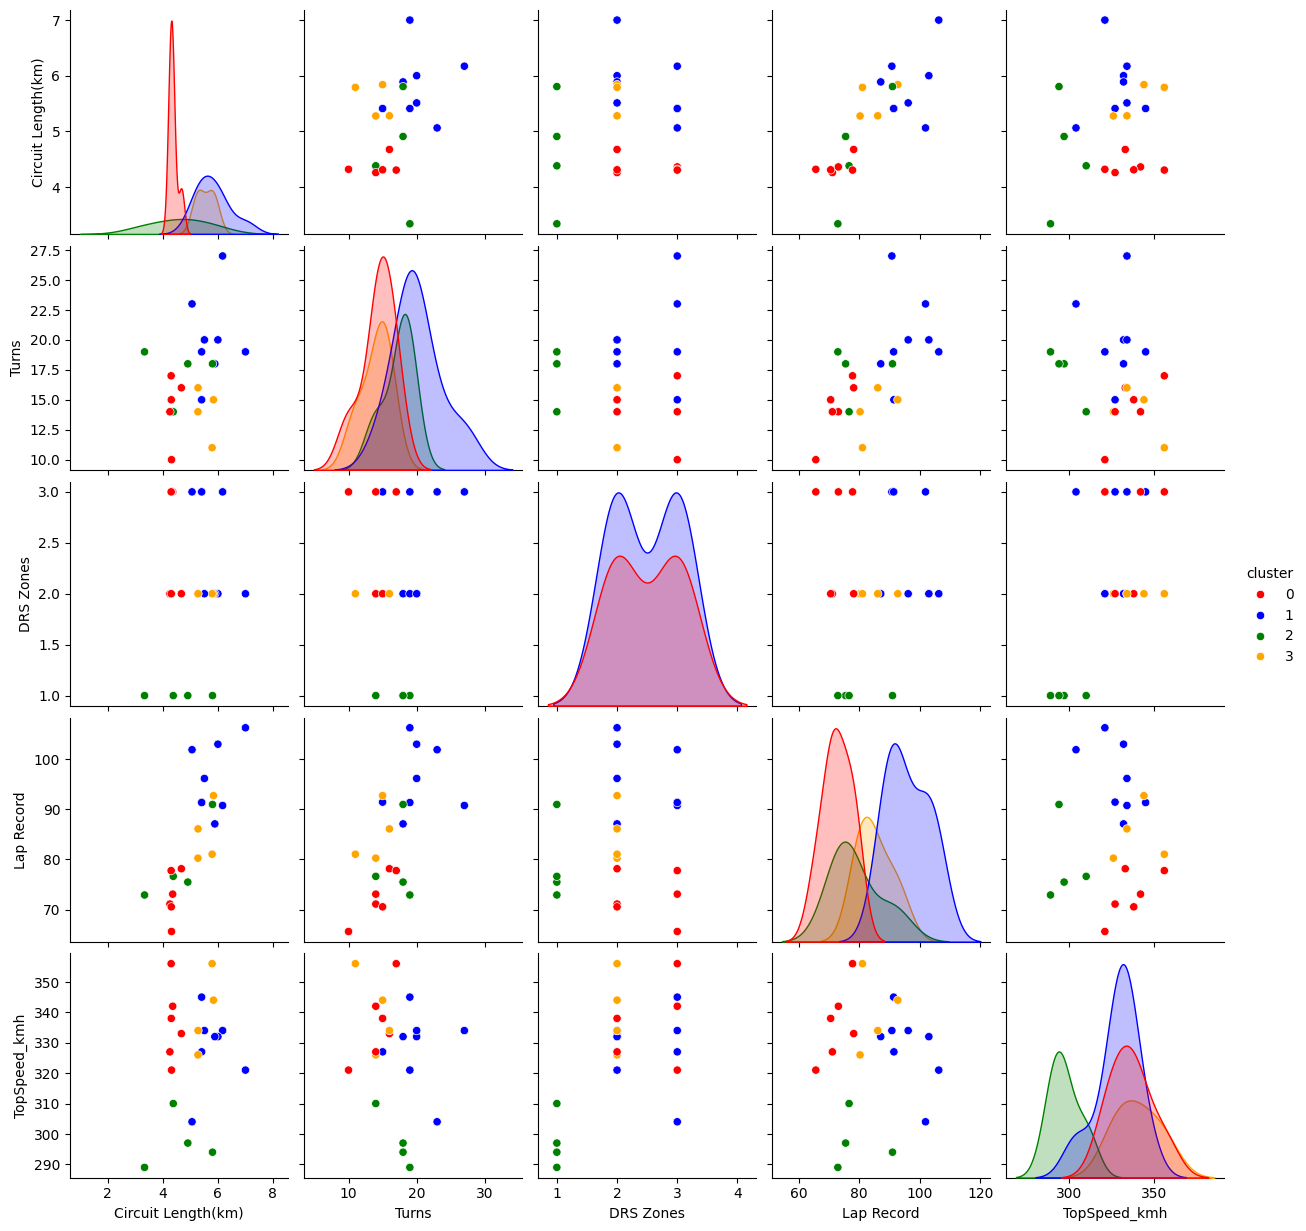

In [423]:
custom_palette = ['red', 'blue', 'green', 'orange']
clustered_tracks = df.dropna(subset=features + ['cluster'])

sns.pairplot(
    clustered_tracks[features + ['cluster']],
    hue="cluster",
    palette=custom_palette
)


In [424]:
results = pd.read_parquet('raw_season_data.parquet')
results.columns

results['MinQualiTime'] = results['MinQualiTime'].dt.total_seconds()

In [425]:
results['TeamAvgQualiTime'] = (
    results.groupby(['Season', 'RoundNumber', 'TeamId'])['MinQualiTime']
           .transform('mean')
)
best_quali_times = (
    results.groupby(["Season", "RoundNumber"])[["MinQualiTime"]]
           .min()
           .rename(columns={"MinQualiTime": "MinOverallQualiTime"})
           .reset_index()
)

results = results.merge(best_quali_times, on=["Season", "RoundNumber"], how="left")
results['NormalizedLapTime'] = results['MinQualiTime']/results['MinOverallQualiTime']
results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Number of Laps,Circuit Length(km),Race Distance(km),Lap Record,Turns,DRS Zones,cluster,TeamAvgQualiTime,MinOverallQualiTime,NormalizedLapTime
0,77,V BOTTAS,BOT,bottas,Mercedes,00d2be,mercedes,Valtteri,Bottas,Valtteri Bottas,...,57,5.412,308.238,91.447,15,3,2,80.5420,80.486,1.001392
1,44,L HAMILTON,HAM,hamilton,Mercedes,00d2be,mercedes,Lewis,Hamilton,Lewis Hamilton,...,57,5.412,308.238,91.447,15,3,2,80.5420,80.486,1.000000
2,33,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,1e41ff,red_bull,Max,Verstappen,Max Verstappen,...,57,5.412,308.238,91.447,15,3,2,82.1700,80.486,1.010362
3,5,S VETTEL,VET,vettel,Ferrari,dc0000,ferrari,Sebastian,Vettel,Sebastian Vettel,...,57,5.412,308.238,91.447,15,3,2,81.3160,80.486,1.008747
4,16,C LECLERC,LEC,leclerc,Ferrari,dc0000,ferrari,Charles,Leclerc,Charles Leclerc,...,57,5.412,308.238,91.447,15,3,2,81.3160,80.486,1.011878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,20,K MAGNUSSEN,MAG,kevin_magnussen,Haas F1 Team,B6BABD,haas,Kevin,Magnussen,Kevin Magnussen,...,58,5.281,306.183,85.637,16,2,3,83.2590,82.595,1.012555
2015,30,L LAWSON,LAW,lawson,RB,6692FF,rb,Liam,Lawson,Liam Lawson,...,58,5.281,306.183,85.637,16,2,3,83.4455,82.595,1.010618
2016,77,V BOTTAS,BOT,bottas,Kick Sauber,52e252,sauber,Valtteri,Bottas,Valtteri Bottas,...,58,5.281,306.183,85.637,16,2,3,83.5420,82.595,1.007373
2017,43,F COLAPINTO,COL,colapinto,Williams,64C4FF,williams,Franco,Colapinto,Franco Colapinto,...,58,5.281,306.183,85.637,16,2,3,83.8665,82.595,1.015945


## Driver Profile (per Track Cluster)
Normalized Time (Driver Best/Best in session) <br>
Could take data from <br>
    -> Each Race Lap <br>
    -> Only Qualifying <br>
    -> FP3 <br>

In [441]:
# Filter 2024
results_2024 = results[results['Season'] == 2024].reset_index()

# Group by cluster and driver
driver_scores = results_2024.groupby(['DriverNumber', 'cluster']).agg(
    AvgDriverQualiTime = ('MinQualiTime', 'mean'),
    StdDriverQualiTime = ('MinQualiTime', 'std'),
    AvgTeamQualiTime = ('TeamAvgQualiTime', 'mean'),
    AvgOverallQualiTime = ('MinOverallQualiTime', 'mean'),
    RacesCount = ('RoundNumber', 'count'),
    TeamName = ('TeamName', 'max'),
    StdNormLapTime = ('NormalizedLapTime', 'std'),
    AvgNormLapTime = ('NormalizedLapTime', 'mean')
).reset_index()

# Compute raw score first
driver_scores['PaceScore'] = 2.71828**(-0.5*(driver_scores['AvgDriverQualiTime']-driver_scores['AvgOverallQualiTime']))
k=100
driver_scores['ConsistencyScore'] = 1 / (1 + k * driver_scores['StdNormLapTime'] / driver_scores['AvgNormLapTime'])

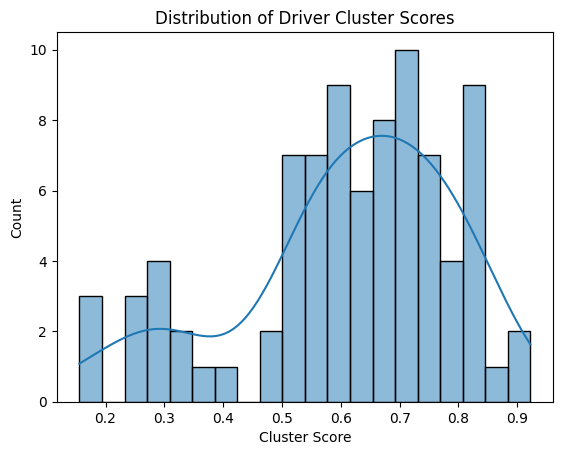

In [442]:
sns.histplot(driver_scores['ConsistencyScore'], bins=20, kde=True)
plt.title('Distribution of Driver Cluster Scores')
plt.xlabel('Cluster Score')
plt.ylabel('Count')
plt.show()


In [443]:
driver_scores

,DriverNumber,cluster,AvgDriverQualiTime,StdDriverQualiTime,AvgTeamQualiTime,AvgOverallQualiTime,RacesCount,TeamName,StdNormLapTime,AvgNormLapTime,PaceScore,ConsistencyScore
0,1,0,73.441000,6.820051,74.011437,72.7450,8,Red Bull Racing,0.017764,1.008642,0.706099,0.362164
1,1,1,97.562400,10.182468,97.837200,97.3276,5,Red Bull Racing,0.003188,1.002416,0.889230,0.758683
2,1,2,85.503750,6.478444,85.733125,85.4615,4,Red Bull Racing,0.000843,1.000472,0.979097,0.922308
3,1,3,83.704714,6.229653,84.784500,83.5520,7,Red Bull Racing,0.002306,1.001848,0.926485,0.812883
4,10,0,74.543125,7.184286,74.411500,72.7450,8,Alpine,0.021956,1.023566,0.406951,0.317957
...,...,...,...,...,...,...,...,...,...,...,...,...
86,77,3,85.621571,6.661597,85.466143,83.5520,7,Kick Sauber,0.023851,1.024790,0.355303,0.300539
87,81,0,73.411250,5.868200,73.157438,72.7450,8,McLaren,0.007070,1.008998,0.716681,0.587999
88,81,1,97.955200,10.233918,98.083600,97.3276,5,McLaren,0.001891,1.006464,0.730665,0.841856
89,81,2,85.892500,6.283860,85.827250,85.4615,4,McLaren,0.003038,1.005181,0.806138,0.767924


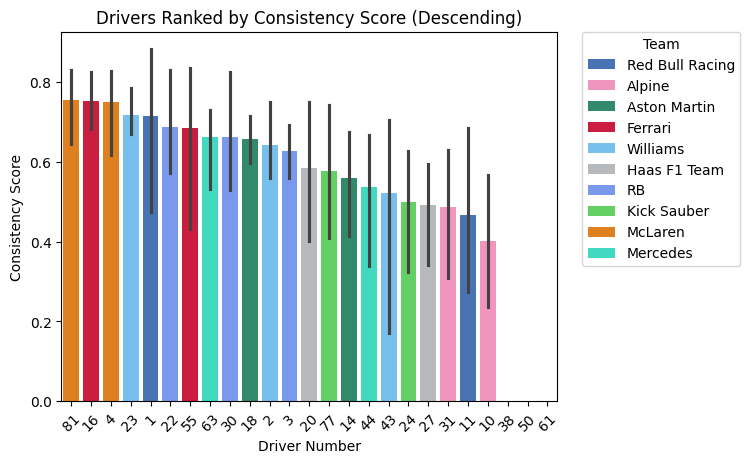

In [445]:
# Define team colors
team_colors = {
    "Mercedes": "#27F4D2",
    "Red Bull Racing": "#3671C6",
    "Ferrari": "#E8002D",
    "McLaren": "#FF8000",
    "Alpine": "#FF87BC",
    "RB": "#6692FF",
    "Aston Martin": "#229971",
    "Williams": "#64C4FF",
    "Kick Sauber": "#52E252",
    "Haas F1 Team": "#B6BABD",
    "Alfa Romeo": "#B12039",
    "AlphaTauri": "#4E7C9B"
}

# Compute mean PaceScore per driver and sort descending
driver_order = driver_scores.groupby('DriverNumber')['ConsistencyScore'].mean().sort_values(ascending=False).index

# Plot with Seaborn
sns.barplot(
    data=driver_scores,
    x='DriverNumber',
    y='ConsistencyScore',
    order=driver_order,
    hue='TeamName',
    palette=team_colors,
)
# remove the default legend
plt.legend(
    title='Team',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

plt.xticks(rotation=45)
plt.ylabel('Consistency Score')
plt.xlabel('Driver Number')
plt.title('Drivers Ranked by Consistency Score (Descending)')
plt.show()


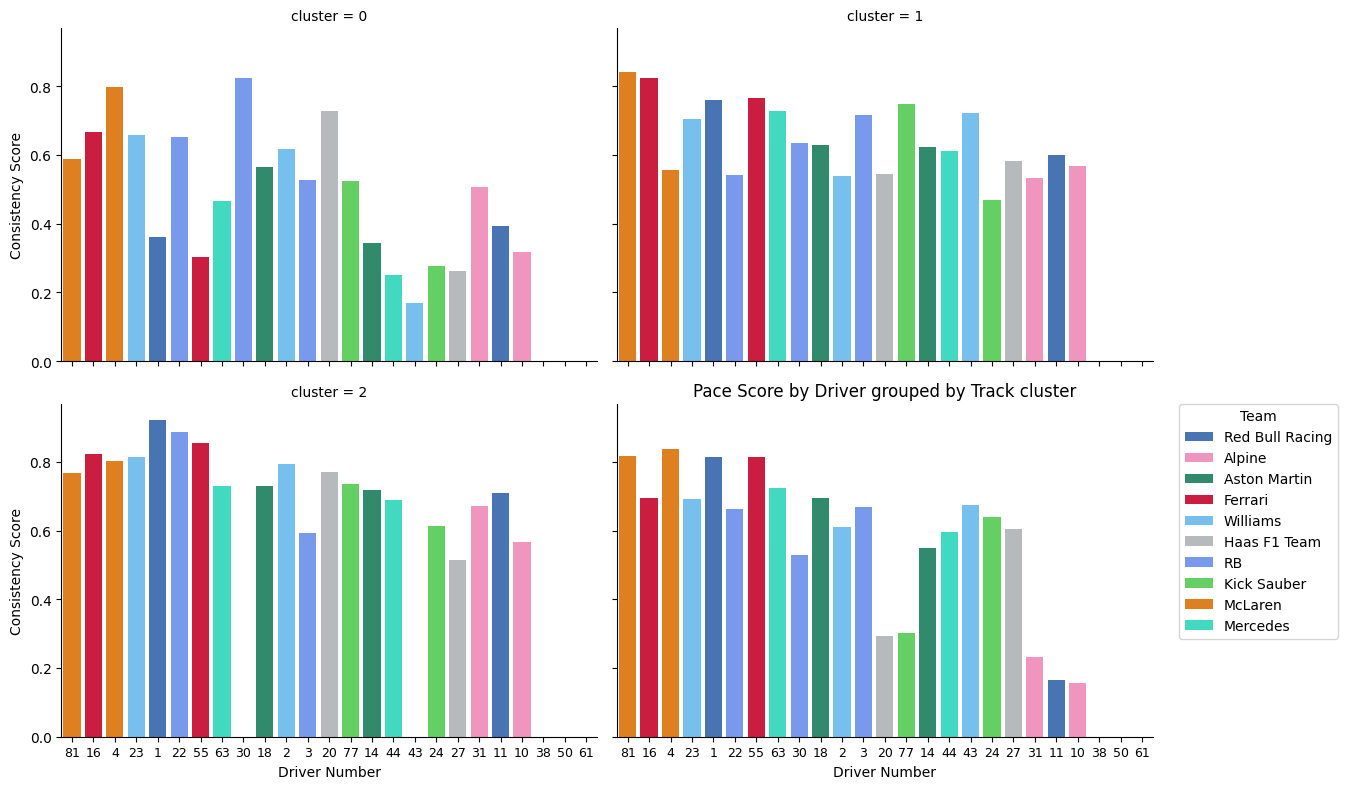

In [455]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure clusters are treated as categorical
driver_scores['cluster'] = driver_scores['cluster'].astype(str)
# Compute overall average PaceScore per driver (for consistent ordering)
driver_order = driver_scores.groupby('DriverNumber')['ConsistencyScore'].mean().sort_values(ascending=False).index
team_colors = {
    "Mercedes": "#27F4D2",
    "Red Bull Racing": "#3671C6",
    "Ferrari": "#E8002D",
    "McLaren": "#FF8000",
    "Alpine": "#FF87BC",
    "RB": "#6692FF",
    "Aston Martin": "#229971",
    "Williams": "#64C4FF",
    "Kick Sauber": "#52E252",
    "Haas F1 Team": "#B6BABD",
    "Alfa Romeo": "#B12039",
    "AlphaTauri": "#4E7C9B"
}
# Create FacetGrid for clusters
g = sns.catplot(
    data=driver_scores,
    x='DriverNumber',
    y='ConsistencyScore',
    col='cluster',
    col_wrap=2,
    kind='bar',
    sharey=True,
    order=driver_order,
    hue='TeamName',
    palette=team_colors,
    dodge=False,
    height=4,
    aspect=1.5
)

# Force x-axis labels for all subplots and rotate them
for ax in g.axes.flatten():
    ax.set_xlabel('Driver Number')
    ax.set_ylabel('Consistency Score')
    ax.set_xticks(range(len(driver_order)))
    ax.set_xticklabels(driver_order, fontsize=9)

# Move the legend outside
g._legend.remove()  # remove the default legend
plt.title('Pace Score by Driver grouped by Track cluster')
plt.legend(
    title='Team',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()


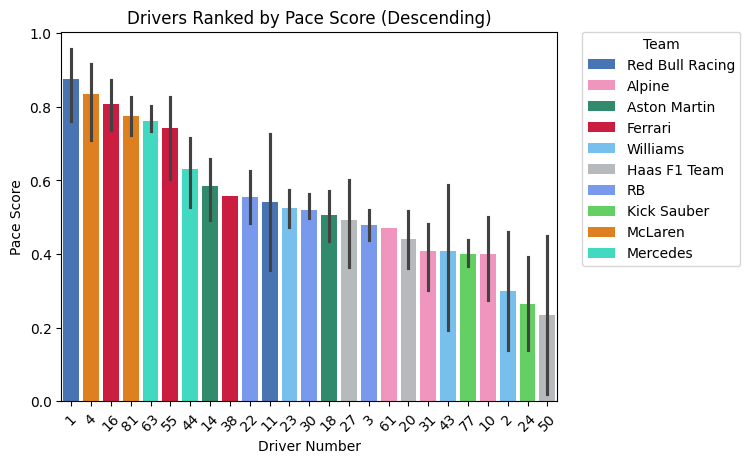

In [446]:
# Define team colors
team_colors = {
    "Mercedes": "#27F4D2",
    "Red Bull Racing": "#3671C6",
    "Ferrari": "#E8002D",
    "McLaren": "#FF8000",
    "Alpine": "#FF87BC",
    "RB": "#6692FF",
    "Aston Martin": "#229971",
    "Williams": "#64C4FF",
    "Kick Sauber": "#52E252",
    "Haas F1 Team": "#B6BABD",
    "Alfa Romeo": "#B12039",
    "AlphaTauri": "#4E7C9B"
}

# Compute mean PaceScore per driver and sort descending
driver_order = driver_scores.groupby('DriverNumber')['PaceScore'].mean().sort_values(ascending=False).index

# Plot with Seaborn
sns.barplot(
    data=driver_scores,
    x='DriverNumber',
    y='PaceScore',
    order=driver_order,
    hue='TeamName',
    palette=team_colors,
)
# remove the default legend
plt.legend(
    title='Team',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

plt.xticks(rotation=45)
plt.ylabel('Pace Score')
plt.xlabel('Driver Number')
plt.title('Drivers Ranked by Pace Score (Descending)')
plt.show()

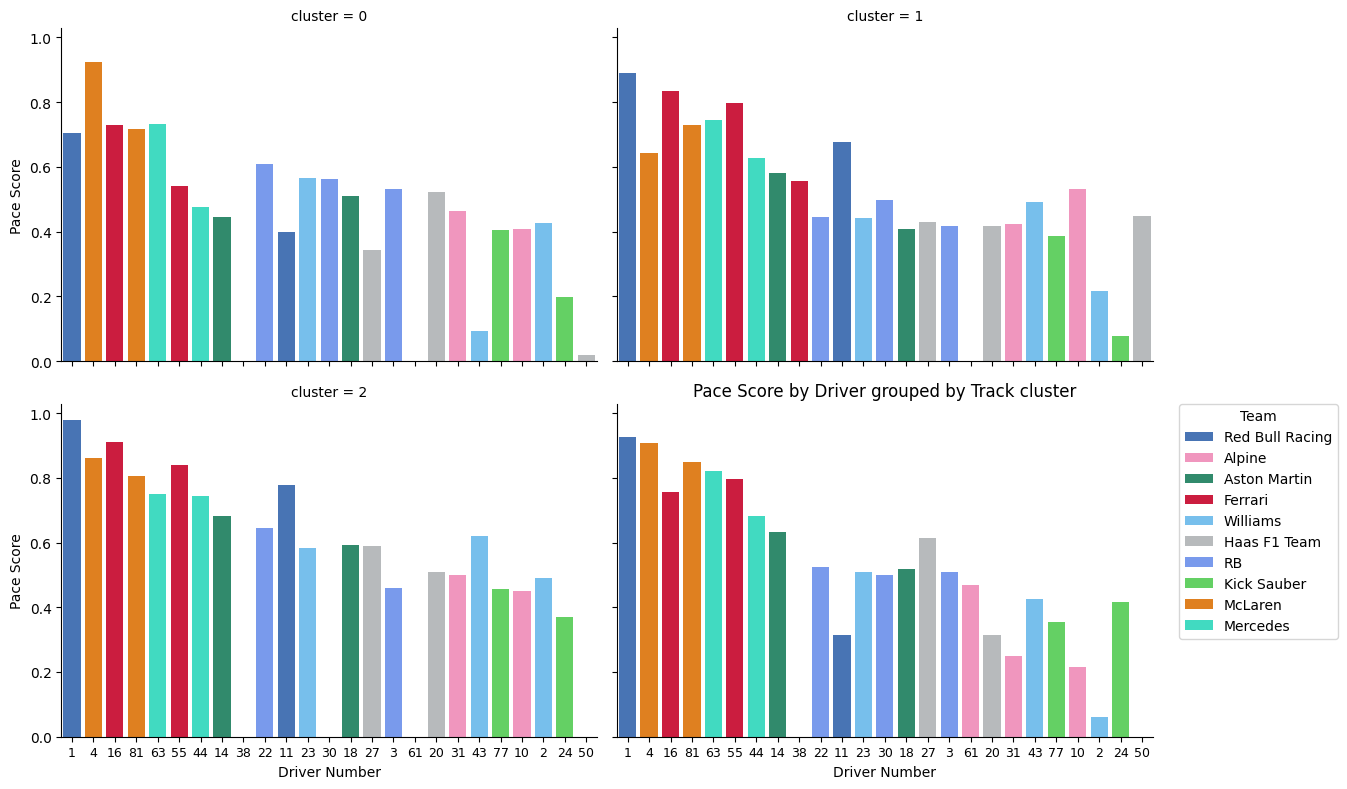

In [454]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure clusters are treated as categorical
driver_scores['cluster'] = driver_scores['cluster'].astype(str)
# Compute overall average PaceScore per driver (for consistent ordering)
driver_order = driver_scores.groupby('DriverNumber')['PaceScore'].mean().sort_values(ascending=False).index
team_colors = {
    "Mercedes": "#27F4D2",
    "Red Bull Racing": "#3671C6",
    "Ferrari": "#E8002D",
    "McLaren": "#FF8000",
    "Alpine": "#FF87BC",
    "RB": "#6692FF",
    "Aston Martin": "#229971",
    "Williams": "#64C4FF",
    "Kick Sauber": "#52E252",
    "Haas F1 Team": "#B6BABD",
    "Alfa Romeo": "#B12039",
    "AlphaTauri": "#4E7C9B"
}
# Create FacetGrid for clusters
g = sns.catplot(
    data=driver_scores,
    x='DriverNumber',
    y='PaceScore',
    col='cluster',
    col_wrap=2,
    kind='bar',
    sharey=True,
    order=driver_order,
    hue='TeamName',
    palette=team_colors,
    dodge=False,
    height=4,
    aspect=1.5
)

# Force x-axis labels for all subplots and rotate them
for ax in g.axes.flatten():
    ax.set_xlabel('Driver Number')
    ax.set_ylabel('Pace Score')
    ax.set_xticks(range(len(driver_order)))
    ax.set_xticklabels(driver_order, fontsize=9)

# Move the legend outside
g._legend.remove()  # remove the default legend
plt.title('Pace Score by Driver grouped by Track cluster')
plt.legend(
    title='Team',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()


In [276]:
driver_scores = (
    driver_scores.pivot_table(
        index='DriverNumber',
        columns='cluster',
        values='PaceScore'
    )
    .rename(columns=lambda c: f'Pace_{c}')
    .reset_index()
)
for col in driver_scores.columns:
    if col.startswith('Pace_'):
        cluster_mean = driver_scores[col].mean(skipna=True)
        driver_scores[col] = driver_scores[col].fillna(cluster_mean)


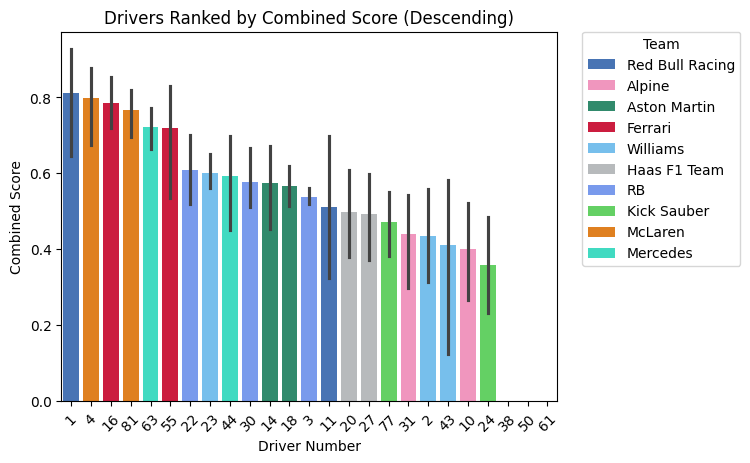

In [453]:
driver_scores['CombScore'] = driver_scores['ConsistencyScore']*0.4+driver_scores['PaceScore']*0.6

# Define team colors
team_colors = {
    "Mercedes": "#27F4D2",
    "Red Bull Racing": "#3671C6",
    "Ferrari": "#E8002D",
    "McLaren": "#FF8000",
    "Alpine": "#FF87BC",
    "RB": "#6692FF",
    "Aston Martin": "#229971",
    "Williams": "#64C4FF",
    "Kick Sauber": "#52E252",
    "Haas F1 Team": "#B6BABD",
    "Alfa Romeo": "#B12039",
    "AlphaTauri": "#4E7C9B"
}

# Compute mean PaceScore per driver and sort descending
driver_order = driver_scores.groupby('DriverNumber')['CombScore'].mean().sort_values(ascending=False).index

# Plot with Seaborn
sns.barplot(
    data=driver_scores,
    x='DriverNumber',
    y='CombScore',
    order=driver_order,
    hue='TeamName',
    palette=team_colors,
)
# remove the default legend
plt.legend(
    title='Team',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

plt.xticks(rotation=45)
plt.ylabel('Combined Score')
plt.xlabel('Driver Number')
plt.title('Drivers Ranked by Combined Score (Descending)')
plt.show()

In [279]:
driver_scores.columns

Index(['DriverNumber', 'Pace_0', 'Pace_1', 'Pace_2', 'Pace_3'], dtype='object', name='cluster')

In [278]:
driver_scores.to_parquet('driver_scores.parquet')